<a href="https://colab.research.google.com/github/kapalli/timeseries/blob/master/Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from fbprophet import Prophet

In [0]:
df = pd.read_csv('/content/Weekly.csv')
df_daily = pd.read_csv('/content/Past90days.csv')
df.head()
df_daily.head()

,Day,Counts
0,2019-11-10,36
1,2019-11-11,32
2,2019-11-12,32
3,2019-11-13,46
4,2019-11-14,67


In [0]:
df.columns = ['ds','y']
df_daily.columns = ['ds','y']

In [0]:
df.head()

,ds,y
0,1/3/2016,42
1,1/10/2016,38
2,1/17/2016,44
3,1/24/2016,47
4,1/31/2016,46


In [0]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = m.make_future_dataframe(periods=120,freq='W')
future.tail()

,ds
329,2022-04-24
330,2022-05-01
331,2022-05-08
332,2022-05-15
333,2022-05-22


In [0]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
329,2022-04-24,90.554090,77.456439,103.948275
330,2022-05-01,90.407362,77.531705,103.445690
331,2022-05-08,93.845286,80.357536,106.730757
332,2022-05-15,98.585256,85.382396,112.480520
333,2022-05-22,100.592745,87.986785,114.261401


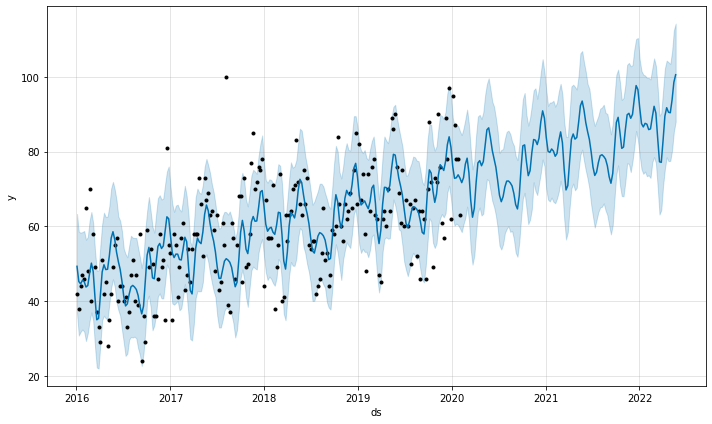

In [0]:
# Python
fig1 = m.plot(forecast)


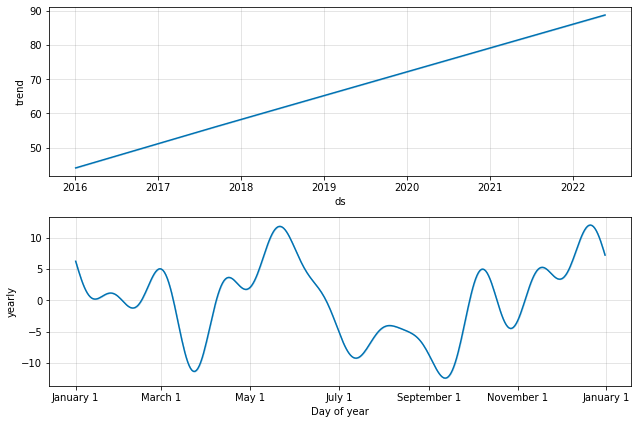

In [0]:
fig2 = m.plot_components(forecast)


In [0]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][forecast['ds'] == '2020-01-05']

,ds,yhat,yhat_lower,yhat_upper
209,2020-01-05,76.017984,62.777788,89.137287


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


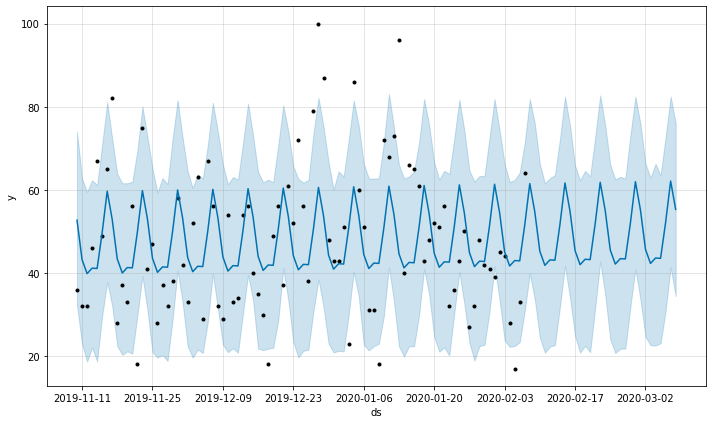

In [0]:
m_daily = Prophet()
m_daily.fit(df_daily)
future_daily = m_daily.make_future_dataframe(periods=30)
forecast_daily = m_daily.predict(future_daily)
fig3 = m_daily.plot(forecast_daily)


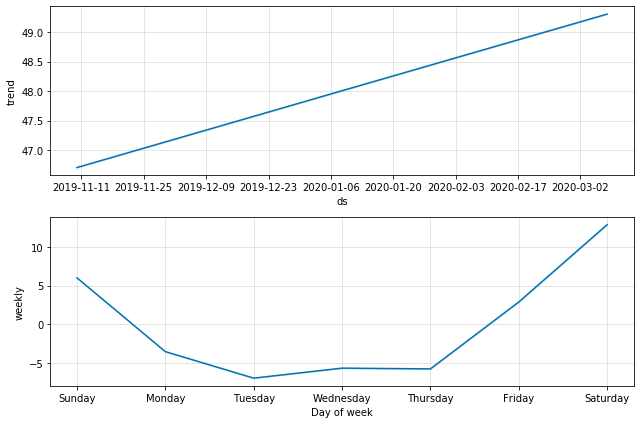

In [0]:
fig5 = m_daily.plot_components(forecast_daily)
